In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense,Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
def check_folders():
    folders=[
        r'C:\Users\User\Downloads\archive (2)\training_set\training_set\cats',
        r'C:\Users\User\Downloads\archive (2)\training_set\training_set\dogs',
        r'C:\Users\User\Downloads\archive (2)\test_set\test_set\cats',
        r'C:\Users\User\Downloads\archive (2)\test_set\test_set\dogs'
    ]
    train_cats=len(os.listdir(r'C:\Users\User\Downloads\archive (2)\training_set\training_set\cats'))   
    train_dogs=len(os.listdir(r'C:\Users\User\Downloads\archive (2)\training_set\training_set\dogs'))
    test_cats=len(os.listdir(r'C:\Users\User\Downloads\archive (2)\test_set\test_set\cats'))
    test_dogs=len(os.listdir(r'C:\Users\User\Downloads\archive (2)\test_set\test_set\dogs'))
    print(f'training cats {train_cats}')
    print(f'training dogs {train_dogs}')
    print(f'testing cats{test_cats}')
    print(f'testing dogs {test_dogs}')
    return train_cats,train_dogs,test_cats,test_dogs

In [3]:
def setup_data():
    train_datagen=ImageDataGenerator(
        rescale=1./255,
        rotation_range=15,
        zoom_range=0.2,
        horizontal_flip=True,
        validation_split=0.2
    )
    test_datagen=ImageDataGenerator(rescale=1./255)
    train_data=train_datagen.flow_from_directory(
        r'C:\Users\User\Downloads\archive (2)\training_set\training_set',
        target_size=(224,224),
        batch_size=32,
        class_mode='binary',
        subset='training'
    )
    val_data=train_datagen.flow_from_directory(
        r'C:\Users\User\Downloads\archive (2)\training_set\training_set',
        target_size=(224,224),
        batch_size=32,
        class_mode='binary',
        subset='validation'
    )
    test_data=train_datagen.flow_from_directory(
    r'C:\Users\User\Downloads\archive (2)\test_set\test_set',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
    )
    return train_data,val_data,test_data

In [4]:
def build_model():
    base_model=VGG16(
        weights='imagenet',
        include_top=False,
        input_shape=(224,224,3)
    )
    base_model.trainable=False
    x=Flatten()(base_model.output)
    x=Dense(128,activation='relu')(x)
    x=Dropout(0.3)(x)
    predictions=Dense(1,activation='sigmoid')(x)
    model=Model(inputs=base_model.input,outputs=predictions)
    model.compile(
        optimizer=Adam(learning_rate=0.0001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

In [8]:
def train_model (model,train_data,val_data):
    history=model.fit(
        train_data,
        epochs=4,
        validation_data=val_data,
        verbose=1
    )
    print('start training')
    return history
def evaluate_model(model,test_data):
    test_loss,test_accuracy=model.evaluate(test_data,verbose=0)
    print(f'accuracy model {test_accuracy:.2%}')
    predictions=model.predict(test_data,verbose=0)
    predicted_classes=(predictions>0.5).astype(int)
    true_classes=test_data.classes
    correct_predictions=np.sum(predicted_classes.flatten()==true_classes)
    total_predicted=len(true_classes)
    manual_accuracy=correct_predictions/total_predicted
    print(f'hand accuracy {manual_accuracy:.2%}')
    return test_accuracy,predictions
def shw_results(history,test_accuracy):
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'],label='training')
    plt.plot(history.history['val_accuracy'],label='verification')
    plt.title('accuracy model')
    plt.ylabel('accuracy')
    plt.xlabel('cycle')
    plt.legend()
    plt.grid(True)
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'],label='training')
    plt.plot(history.history['val_loss'],label='verification')
    plt.title('loss model')
    plt.ylabel('loss')
    plt.xlabel('cycle')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    print(f"\n{'='*50}")
    print('sumrry')
    print(f'accuracy training {history.history["accuracy"][-1]:.2%}')
    print(f'accuracy verification {history.history["val_accuracy"][-1]:.2%}')
    print(f"{'='*50}")
    
    

    
    
    
    

In [9]:
def save_model(model):
    model.save('cats_dogs_classifier.h5')

training cats 4001
training dogs 4006
testing cats1012
testing dogs 1013
Found 6404 images belonging to 2 classes.
Found 1601 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,926,209 (68.38 MB)

 Trainable params: 3,211,521 (12.25 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/4
201/201 ━━━━━━━━━━━━━━━━━━━━ 2329s 12s/step - accuracy: 0.7896 - loss: 0.4420 - val_accuracy: 0.9026 - val_loss: 0.2265
Epoch 2/4
201/201 ━━━━━━━━━━━━━━━━━━━━ 2353s 12s/step - accuracy: 0.8914 - loss: 0.2551 - val_accuracy: 0.9151 - val_loss: 0.2076
Epoch 3/4
201/201 ━━━━━━━━━━━━━━━━━━━━ 2397s 12s/step - accuracy: 0.9074 - loss: 0.2156 - val_accuracy: 0.9119 - val_loss: 0.1995
Epoch 4/4
201/201 ━━━━━━━━━━━━━━━━━━━━ 2069s 10s/step - accuracy: 0.9114 - loss: 0.2158 - val_accuracy: 0.9269 - val_loss: 0.1902
start training
accuracy model 91.20%
hand accuracy 90.90%


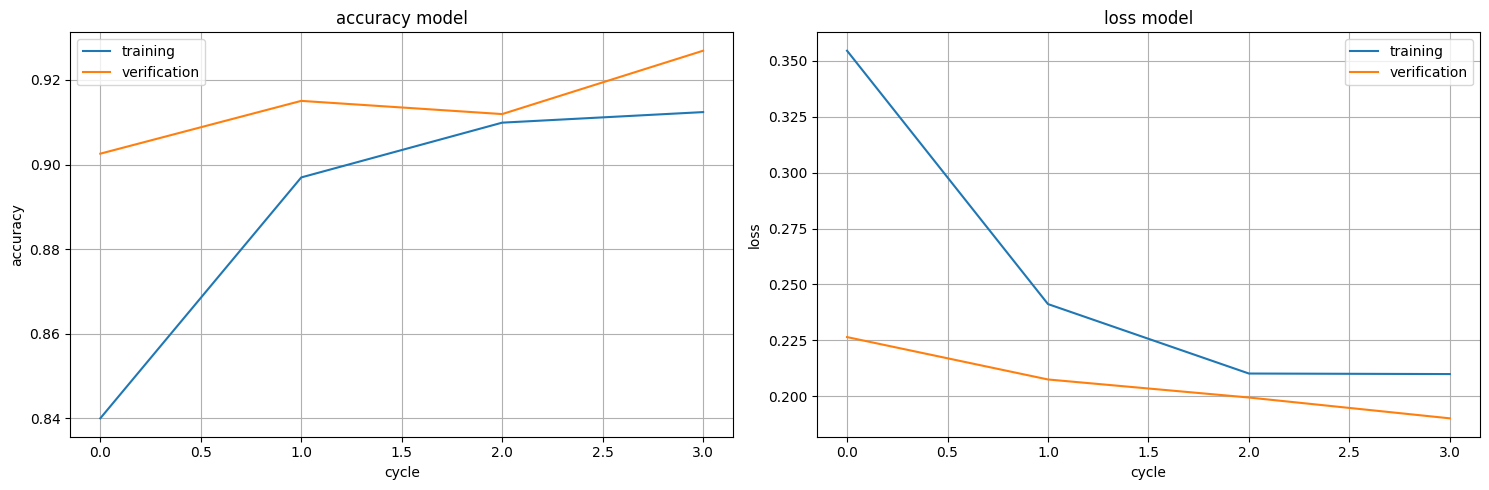


sumrry
accuracy training 91.24%
accuracy verification 92.69%


In [10]:
def main():
    train_cats,train_dogs,test_cats,test_dogs=check_folders()
    train_data,val_data,test_data=setup_data()
    model=build_model()
    model.summary()
    history=train_model(model,train_data,val_data)
    test_accuracy,predictions=evaluate_model(model,test_data)
    shw_results(history,test_accuracy)
    save_model(model)
if __name__=='__main__':
    main()